<a href="https://colab.research.google.com/github/aannddrree/disciplinaIA/blob/main/PLN_Introducao_Com_Plataformas_Online.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução ao PLN (Processamento de Linguagem Natural)

**Curso:** Sistemas de Informação  
**Professor:** André Luiz Silva  
**Notebook gerado:** 2025-09-19

Este notebook acompanha uma aula prática de PLN, com foco em:
- Conceitos básicos e demonstrações com **plataformas online**;
- Exemplos simples em **Python**;
- Atividades guiadas

---
## Objetivos
- Entender o que é PLN e exemplos do dia a dia.
- Rodar e modificar pequenos scripts de PLN.
- Experimentar análise de sentimentos, limpeza de texto e contagem de palavras.

## Como usar
1. Execute célula por célula para explorar.
2. Edite os textos de exemplo e **observe o efeito** no resultado.


## Aquecimento: Plataformas Online (sem código)

Testes rápidos que você pode demonstrar aos alunos:
- **Hugging Face Spaces** (modelos prontos para teste): procure por "sentiment analysis" ou "text classification".
- **MonkeyLearn** → análise de sentimentos e palavras‑chave via interface.
- **Google Tradutor** → exemplo clássico de PLN aplicado.

👉 Após o aquecimento, partimos para o Python.


## Instalação de bibliotecas (Colab)
As bibliotecas abaixo facilitam tarefas de PLN iniciais.
- **TextBlob**: análise de sentimento simplificada (em inglês).
- **NLTK**: stopwords (palavras irrelevantes), utilidades para linguagem.

> Observação: A análise de sentimento do TextBlob funciona melhor em **inglês**. Para português em nível iniciante, manteremos exemplos didáticos e focaremos em técnicas gerais (tokenização, stopwords, frequência).

In [1]:
!pip -q install textblob nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## 1) Contagem de Palavras (tokenização simples)
Mostra como dividir um texto em palavras (tokens) e contar.


In [2]:
texto = "Processamento de linguagem natural é muito legal e útil para diversos projetos de software."

# Tokenização super simples (por espaço)
palavras = texto.split()
print("Texto:", texto)
print("Tokens:", palavras)
print("Quantidade de palavras:", len(palavras))

Texto: Processamento de linguagem natural é muito legal e útil para diversos projetos de software.
Tokens: ['Processamento', 'de', 'linguagem', 'natural', 'é', 'muito', 'legal', 'e', 'útil', 'para', 'diversos', 'projetos', 'de', 'software.']
Quantidade de palavras: 14


## 2) Frequência de Palavras (contagem com dicionário)
Exemplo rápido para saber quais palavras aparecem mais.

In [3]:
from collections import Counter

texto = """
Hoje eu fui para a universidade estudar inteligência artificial.
Eu adoro estudar IA porque IA resolve problemas e ajuda pessoas.
Estudar é importante!
"""

tokens = [t.strip(".,!?:;()\"\n").lower() for t in texto.split() if t.strip()]
freq = Counter(tokens)

print("Tokens:", tokens[:20], "...")
print("Top 10 palavras mais frequentes:")
for palavra, qt in freq.most_common(10):
    print(f"{palavra:15s} -> {qt}")

Tokens: ['hoje', 'eu', 'fui', 'para', 'a', 'universidade', 'estudar', 'inteligência', 'artificial', 'eu', 'adoro', 'estudar', 'ia', 'porque', 'ia', 'resolve', 'problemas', 'e', 'ajuda', 'pessoas'] ...
Top 10 palavras mais frequentes:
estudar         -> 3
eu              -> 2
ia              -> 2
hoje            -> 1
fui             -> 1
para            -> 1
a               -> 1
universidade    -> 1
inteligência    -> 1
artificial      -> 1


## 3) Remoção de Stopwords (NLTK)
Stopwords são palavras muito comuns ("de", "a", "o", "e", ...), geralmente removidas para análises mais limpas.

In [4]:
from nltk.corpus import stopwords

texto = "Hoje eu fui para a universidade estudar inteligência artificial e eu gostei muito."
tokens = [t.strip(".,!?:;()\"\n").lower() for t in texto.split() if t.strip()]

# Conjunto de stopwords em português (pode não ser perfeito, mas ajuda)
sw = set(stopwords.words('portuguese'))
tokens_sem_sw = [t for t in tokens if t not in sw]

print("Antes:", tokens)
print("Depois:", tokens_sem_sw)

Antes: ['hoje', 'eu', 'fui', 'para', 'a', 'universidade', 'estudar', 'inteligência', 'artificial', 'e', 'eu', 'gostei', 'muito']
Depois: ['hoje', 'universidade', 'estudar', 'inteligência', 'artificial', 'gostei']


## 4) Análise de Sentimento (TextBlob — melhor em inglês)
Vamos demonstrar com frases em inglês, onde o TextBlob é mais confiável.
O atributo `polarity` varia de -1 (negativo) a +1 (positivo).

No TextBlob, **polarity** é o escore de sentimento da frase, variando de -1.0 a +1.0:

* +1.0 → sentimento muito positivo
* 0.0 → neutro
* -1.0 → muito negativo

No TextBlob, **subjectivity** mede quão opinativa é uma frase, num intervalo de 0 a 1:

* 0.0 → objetiva/factual (afirmação de fato)
* 1.0 → muito subjetiva (opinião, julgamento, sentimento)

In [5]:
from textblob import TextBlob

frases = [
    "I love programming in Python!",
    "This traffic is terrible.",
    "The weather is okay, not great, not bad.",
]

for f in frases:
    s = TextBlob(f).sentiment
    print(f"Frase: {f}\n → Sentimento: polarity={s.polarity:.3f}, subjectivity={s.subjectivity:.3f}\n")

Frase: I love programming in Python!
 → Sentimento: polarity=0.625, subjectivity=0.600

Frase: This traffic is terrible.
 → Sentimento: polarity=-1.000, subjectivity=1.000

Frase: The weather is okay, not great, not bad.
 → Sentimento: polarity=0.150, subjectivity=0.639



## 5) Normalização simples (lowercase, pontuação)
Pequena limpeza para facilitar análises: minúsculas e remoção de pontuação básica.

In [6]:
import re

def limpar_texto(t):
    t = t.lower()
    t = re.sub(r"[^\w\sçáéíóúàãõâêîôûü]+", " ", t, flags=re.UNICODE)
    t = re.sub(r"\s+", " ", t).strip()
    return t

texto = "PLN é incrível! Ajuda MUITO em vários projetos, como chatbots, análise de texto, etc."
print("Original:", texto)
print("Limpo:", limpar_texto(texto))

Original: PLN é incrível! Ajuda MUITO em vários projetos, como chatbots, análise de texto, etc.
Limpo: pln é incrível ajuda muito em vários projetos como chatbots análise de texto etc


## 6) Mini-pipeline: contagem de palavras sem stopwords
Juntando conceitos: limpar → tokenizar → remover stopwords → contar.

In [9]:
from collections import Counter
from nltk.corpus import stopwords
import re

def limpar_texto(t):
    t = t.lower()
    t = re.sub(r"[^\w\sçáéíóúàãõâêîôûü]+", " ", t, flags=re.UNICODE)
    t = re.sub(r"\s+", " ", t).strip()
    return t

texto = """
A inteligência artificial é uma área da computação que resolve problemas reais.
Muitos projetos usam PLN para entender linguagem humana e gerar valor.
Estudar IA é importante para futuros profissionais de tecnologia.
"""

limpo = limpar_texto(texto)
tokens = limpo.split()
sw = set(stopwords.words('portuguese'))
tokens_sem_sw = [t for t in tokens if t not in sw]
contagem = Counter(tokens_sem_sw)

print("Texto limpo:\n", limpo)
print("\nTop 10 palavras (sem stopwords):")
for palavra, qt in contagem.most_common(10):
    print(f"{palavra:15s} -> {qt}")

Texto limpo:
 a inteligência artificial é uma área da computação que resolve problemas reais muitos projetos usam pln para entender linguagem humana e gerar valor estudar ia é importante para futuros profissionais de tecnologia

Top 10 palavras (sem stopwords):
inteligência    -> 1
artificial      -> 1
área            -> 1
computação      -> 1
resolve         -> 1
problemas       -> 1
reais           -> 1
muitos          -> 1
projetos        -> 1
usam            -> 1


## Atividades
1. **Troque os textos** nas células anteriores por frases do seu interesse (ex.: avaliações de filmes, comentários de apps, etc.).
2. **Crie um ranking** de palavras mais frequentes a partir de um parágrafo de notícia (copie/cole o texto).
3. **Experimento**: compare a contagem **com** e **sem** stopwords. O que muda?
4. **Desafio**: escreva 3 frases em inglês (uma positiva, uma neutra e uma negativa) e verifique a polaridade com o TextBlob.

### Extra
- Faça um gráfico de barras simples com as top 10 palavras mais frequentes.




```
# This is formatted as code
```

## Gráfico com as 10 palavras mais frequentes
Lembre-se: **não** confie apenas em frequência — contexto importa!


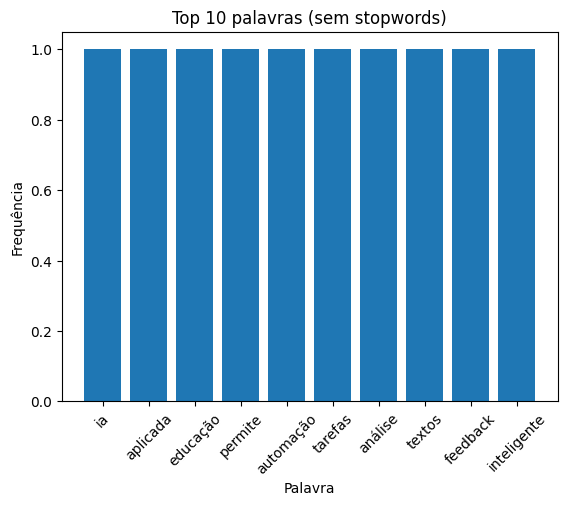

In [8]:
from collections import Counter
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt

def limpar_texto(t):
    t = t.lower()
    t = re.sub(r"[^\w\sçáéíóúàãõâêîôûü]+", " ", t, flags=re.UNICODE)
    t = re.sub(r"\s+", " ", t).strip()
    return t

texto = """
A IA aplicada à educação permite automação de tarefas, análise de textos e feedback inteligente.
Com PLN, podemos extrair palavras‑chave, resumir conteúdos e detectar sentimentos.
"""

limpo = limpar_texto(texto)
tokens = limpo.split()
sw = set(stopwords.words('portuguese'))
tokens_sem_sw = [t for t in tokens if t not in sw]
contagem = Counter(tokens_sem_sw)

top10 = contagem.most_common(10)
labels = [p for p, _ in top10]
values = [v for _, v in top10]

plt.figure()
plt.bar(labels, values)
plt.title('Top 10 palavras (sem stopwords)')
plt.xlabel('Palavra')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

## Encerramento
- Você viu: tokenização simples, contagem de palavras, stopwords, normalização e um **primeiro contato** com análise de sentimento.
